In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D ,Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


# Part 1 - Building the CNN

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection

classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Part 2 - Fitting the CNN to the images

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   vertical_flip=True,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
)
#/Users/mgurunule/Documents/desktop/Folders/Machine_Learning/Ineuron/Deep/deep Learning/Binary_classification
training_set = train_datagen.flow_from_directory('images2/train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('images2/test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 3,
                         validation_data = test_set,    
                         validation_steps = 10)
classifier.save('model_1.h5')

Found 16 images belonging to 2 classes.
Found 9 images belonging to 2 classes.
Epoch 1/3
50/50 [==============================] - 29s 585ms/step - loss: 0.3810 - accuracy: 0.8025 - val_loss: 0.2252 - val_accuracy: 0.8889
Epoch 2/3
50/50 [==============================] - 29s 589ms/step - loss: 0.0898 - accuracy: 0.9787 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 3/3
50/50 [==============================] - 30s 604ms/step - loss: 0.0675 - accuracy: 0.9850 - val_loss: 0.4587 - val_accuracy: 0.7778


In [10]:
training_set.class_indices

{'hrithik': 0, 'jacqueline': 1}

# Part 3 - Making new predictions

## Prediction 1

In [11]:
import numpy as np
from keras.preprocessing import image
import cv2
test_image = image.load_img('IMG_4219.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result.shape)
if result[0][0] == 1:
    prediction = 'hrithik'
    print(prediction)
else:
    prediction = 'jacqueline'
    print(prediction)

(1, 1)
jacqueline


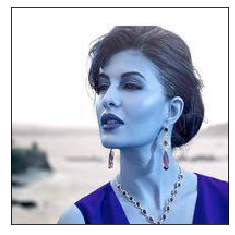

In [12]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('IMG_4219.jpg',1)

plt.imshow(img, cmap = 'jet', interpolation = 'nearest')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Prediction 2

In [13]:
test_image = image.load_img('IMG_4230.jpg', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result.shape)
if result[0][0] == 1:
    prediction = 'hrithik'
    print(prediction)
else:
    prediction = 'jacqueline'
    print(prediction)

(1, 1)
jacqueline


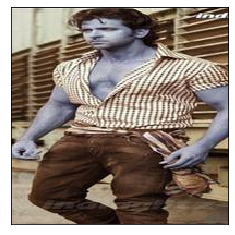

In [14]:
img = cv2.imread('IMG_4230.jpg',1)

plt.imshow(img, cmap = 'jet', interpolation = 'nearest')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()